# Hoeffding inequality

Run a computer simulation for flipping 1,000 virtual fair coins.  Flip each coin inde-pendently 10 times.  Focus on 3 coins as follows:

- c1 is the first coin flipped
- crand is a coin chosen randomly from the 1,000
- cmin is the coin which had the minimum frequency of heads (pick the earlier one in case of a tie).  

Let ν1,νrand, and νmin be the fraction of heads obtained for the 3 respective coins out of the 10 tosses.

Run the experiment 100,000 times in order to get a full distribution of ν1, νrand, and νmin(note that crand and cmin will change from run to run).

In [1]:
import numpy as np

In [3]:
n_iters = 100000
n_coins = 1000
n_flips = 10

v1 = []
v2 = []
v3 = []

for _ in range(n_iters):
    
    # simulate coin flips
    coin_flips = np.random.randint(0,2, (n_coins,n_flips))
    
    # first coin
    c1 = 0
    # random coin
    c2 = np.random.randint(0, n_coins)
    # coin with minimum fraction of heads
    c3 = np.argmin(np.sum(coin_flips, axis=1))
    
    v1.append(np.mean(coin_flips[c1,:]))
    v2.append(np.mean(coin_flips[c2,:]))
    v3.append(np.mean(coin_flips[c3,:]))

In [5]:
np.mean(v3)

0.037749

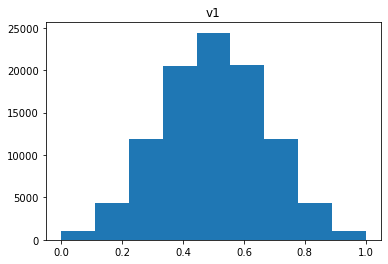

In [6]:
import matplotlib.pyplot as plt

plt.hist(v1, bins=np.linspace(0,1,10))
plt.title("v1")
plt.show()

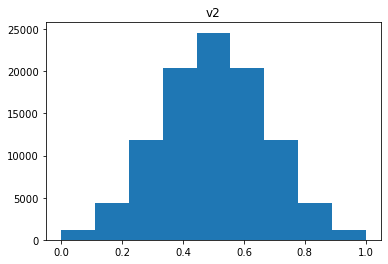

In [7]:
plt.hist(v2, bins=np.linspace(0, 1, 10))
plt.title("v2")
plt.show()

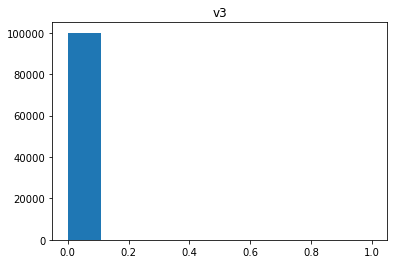

In [8]:
plt.hist(v3, bins=np.linspace(0,1,10))
plt.title("v3")
plt.show()

# Linear regression
Create a dataset using the same method as for homework 1

In [14]:
import numpy as np
from matplotlib import pyplot as plt

d = 2

class Dataset:
    def __init__(self, N):
        self.X = 2*np.random.rand(N, d+1)-1
        self.X[:,0] = 1.0
        X = self.X
        xa = 2*np.random.rand() - 1
        ya = 2*np.random.rand() - 1
        xb = 2*np.random.rand() - 1
        yb = 2*np.random.rand() - 1
        xa, xb = min(xa, xb), max(xa, xb)
        self.xa = xa
        self.ya = ya
        self.xb = xb
        self.yb = yb
        self.a = (yb-ya)/(xb-xa)
        self.y = self.evaluate(X)
        
    def evaluate(self, X):
        return 2*(X[:,2] > self.ya + (X[:,1] - self.xa)*self.a)-1
        
    def plot(self, y=None):
        above = self.X[np.where(self.y < 0)]
        below = self.X[np.where(self.y >= 0)]
        plt.scatter(above[:,1], above[:,2], marker="x")
        plt.scatter(below[:,1], below[:,2], marker="o")
        if not y is None:
            wrong = np.where(y != self.y)
            plt.scatter(self.X[wrong,1], self.X[wrong,2], c="red")
        plt.plot([self.xa, self.xb], [self.ya, self.yb])
        plt.show()
        
        
def fit_ls(X, y):
    return np.linalg.solve(X.T@X, X.T@y)

def evaluate(X, w):
    return np.sign(X@w)

N = 100
gs = np.zeros([1000, N])

total_Ein = 0.0
for i in range(1000):
    ds = Dataset(N)
    w_ls = fit_ls(ds.X, ds.y)
    total_Ein += np.sum(evaluate(ds.X, w_ls) != ds.y)/N
    
print(total_Ein/1000)

0.0408200000000001
